# Часть 1: K-Means
## Кластеризация исполнителей по жанрам

В этом задании вы попробуете кластеризовать исполнителей по жанрам на основе данных о прослушивании.

В матрице sample_matrix по строкам стоят пользователи, а по столбцам - исполнители.

Для каждой пары (пользователь,исполнитель) в таблице стоит число - доля (процент) прослушивания этого исполнителя выбранным пользователем.

## Импорт библиотек, загрузка данных

In [10]:
import pandas as pd

In [11]:
ratings = pd.read_excel("https://github.com/evgpat/edu_stepik_rec_sys/blob/main/datasets/sample_matrix.xlsx?raw=true", engine='openpyxl')

In [12]:
ratings.head()

,user,the beatles,radiohead,deathcab for cutie,coldplay,modest mouse,sufjan stevens,dylan. bob,red hot clili peppers,pink fluid,...,municipal waste,townes van zandt,curtis mayfield,jewel,lamb,michal w. smith,群星,agalloch,meshuggah,yellowcard
0,0,NaN,0.020417,NaN,NaN,NaN,NaN,NaN,0.030496,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,0.184962,0.024561,NaN,NaN,0.136341,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,0.028635,NaN,NaN,NaN,0.024559,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.043529,0.086281,0.034590,0.016712,0.015935,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Задание

Транспонируем матрицу ratings, чтобы по строкам стояли исполнители.

In [13]:
ratings = ratings.T

Выкиньте строку под названием `user`.

In [14]:
ratings

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
user,0.000000,1.000000,2.000000,3.0,4.000000,5.000000,6.0,7.0,8.000000,9.000000,...,4990.000000,4991.0,4992.000000,4993.000000,4994.000000,4995.000000,4996.0,4997.000000,4998.0,4999.000000
the beatles,NaN,NaN,NaN,NaN,0.043529,NaN,NaN,NaN,0.093398,0.017621,...,NaN,NaN,0.121169,0.038168,0.007939,0.017884,NaN,0.076923,NaN,NaN
radiohead,0.020417,0.184962,NaN,NaN,0.086281,0.006322,NaN,NaN,NaN,0.019156,...,0.017735,NaN,NaN,NaN,0.011187,NaN,NaN,NaN,NaN,NaN
deathcab for cutie,NaN,0.024561,0.028635,NaN,0.034590,NaN,NaN,NaN,NaN,0.013349,...,0.121344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027893
coldplay,NaN,NaN,NaN,NaN,0.016712,NaN,NaN,NaN,NaN,NaN,...,0.217175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
michal w. smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
群星,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agalloch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meshuggah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# ваш код здесь
ratings=ratings.drop("user")
ratings

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,NaN,NaN,NaN,NaN,0.043529,NaN,NaN,NaN,0.093398,0.017621,...,NaN,NaN,0.121169,0.038168,0.007939,0.017884,NaN,0.076923,NaN,NaN
radiohead,0.020417,0.184962,NaN,NaN,0.086281,0.006322,NaN,NaN,NaN,0.019156,...,0.017735,NaN,NaN,NaN,0.011187,NaN,NaN,NaN,NaN,NaN
deathcab for cutie,NaN,0.024561,0.028635,NaN,0.034590,NaN,NaN,NaN,NaN,0.013349,...,0.121344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027893
coldplay,NaN,NaN,NaN,NaN,0.016712,NaN,NaN,NaN,NaN,NaN,...,0.217175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
modest mouse,NaN,NaN,NaN,NaN,0.015935,NaN,NaN,NaN,NaN,0.030437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
michal w. smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
群星,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agalloch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meshuggah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Вопрос для Quiz

Сколько строк осталось в матрице ratings?

Заполните пропуски нулями.

In [16]:
# ваш код здесь
ratings=ratings.fillna(0)

Нормализуйте данные при помощи `normalize`.

In [19]:
from sklearn.preprocessing import normalize

data = ratings.values
# ваш код здесь
data_normalized = normalize(data, norm='l2')
ratings_normalized = pd.DataFrame(data_normalized, columns=ratings.columns)
display(ratings_normalized)

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.000000,0.000000,0.000000,0.0,0.012054,0.000000,0.0,0.0,0.025864,0.004880,...,0.000000,0.0,0.033554,0.010569,0.002199,0.004952,0.0,0.021302,0.0,0.000000
1,0.009348,0.084688,0.000000,0.0,0.039505,0.002894,0.0,0.0,0.000000,0.008771,...,0.008120,0.0,0.000000,0.000000,0.005122,0.000000,0.0,0.000000,0.0,0.000000
2,0.000000,0.017278,0.020144,0.0,0.024333,0.000000,0.0,0.0,0.000000,0.009391,...,0.085361,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.019622
3,0.000000,0.000000,0.000000,0.0,0.011129,0.000000,0.0,0.0,0.000000,0.000000,...,0.144628,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
4,0.000000,0.000000,0.000000,0.0,0.010260,0.000000,0.0,0.0,0.000000,0.019597,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
996,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
997,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
998,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


Примените KMeans с 5ю кластерами на преобразованной матрице (сделайте fit, а затем вычислите кластеры при помощи predict).

In [23]:
from sklearn.cluster import KMeans

# ваш код здесь
clustering = KMeans(n_clusters = 5).fit(ratings_normalized)

clusters = clustering.predict(data_normalized)

print(clusters)

[3 1 2 3 1 1 3 3 3 4 0 1 3 1 1 3 3 1 1 0 0 1 1 3 1 1 1 1 1 1 0 2 3 3 3 0 3
 3 1 3 1 1 2 2 4 1 0 1 1 3 0 1 0 3 0 1 1 1 2 1 1 1 0 1 1 3 1 1 2 0 1 1 1 4
 1 4 1 1 3 1 2 1 1 0 3 1 3 3 3 1 1 1 1 0 1 1 4 2 3 1 1 3 1 1 2 3 4 0 3 1 3
 3 2 2 4 4 1 2 1 4 1 2 0 1 1 2 1 0 4 0 1 1 1 4 3 3 3 4 1 3 3 0 1 0 4 1 1 1
 1 3 0 4 3 4 0 4 1 0 1 4 3 3 1 0 2 0 2 4 3 2 3 1 4 3 4 4 3 1 1 1 1 4 2 1 2
 0 3 2 2 0 4 1 3 0 1 0 1 2 2 1 1 1 1 3 3 0 2 1 2 2 3 3 3 3 3 0 3 4 1 0 1 0
 1 1 1 3 3 3 2 1 3 2 2 1 1 3 4 1 0 4 1 0 2 1 3 1 2 1 1 1 3 3 3 2 2 3 3 1 1
 1 4 3 4 2 3 1 0 3 0 0 4 2 3 1 3 1 3 3 0 0 3 3 3 3 3 1 2 0 3 2 2 3 3 4 1 1
 3 3 4 1 1 1 0 0 4 2 4 1 4 0 3 3 3 0 0 3 0 3 2 3 3 1 1 1 3 2 0 0 1 1 3 0 0
 0 0 4 0 2 2 1 1 2 1 3 2 4 3 3 2 3 2 1 0 2 3 0 1 4 3 0 3 1 1 0 1 2 1 4 3 3
 2 3 1 1 4 1 1 1 2 0 1 2 0 2 1 3 1 0 1 3 3 0 1 1 3 2 1 1 1 4 2 4 3 1 2 1 0
 2 2 0 4 0 3 3 2 2 0 4 0 3 1 1 1 0 1 1 0 3 4 1 3 4 1 3 2 1 1 3 2 1 2 0 4 4
 1 2 4 1 3 3 1 2 0 3 4 4 3 3 3 1 3 4 3 4 1 4 2 3 1 3 0 0 3 3 4 4 0 2 1 3 3
 2 4 4 1 4 3 1 4 3 1 2 4 

Выведите на экран центры кластеров (центроиды)

In [27]:
# ваш код здесь

centroids = clustering.cluster_centers_
centroids

array([[ 1.94723258e-03,  1.28684825e-03,  6.79651004e-04, ...,
         5.25227907e-04,  2.11486124e-03,  4.19399591e-04],
       [ 1.12428542e-03,  2.39094843e-03,  2.49329892e-03, ...,
        -2.16840434e-18,  1.73236174e-03,  4.39795577e-03],
       [ 1.64083544e-04,  1.33938758e-04,  1.15659278e-03, ...,
         2.09331967e-03,  4.05382579e-03,  1.50392987e-03],
       [ 2.50776790e-03,  7.14244672e-04,  1.41799566e-03, ...,
         5.46265755e-03,  0.00000000e+00,  8.26602014e-04],
       [ 1.23911918e-03, -2.16840434e-19,  8.95330620e-05, ...,
         1.08420217e-18,  2.16840434e-19, -8.67361738e-19]])

Для каждого кластера найдем топ-10 исполнителей, наиболее близких к центроидам соотвествующего кластера.

Схожесть исполнителей будем считать по косинусной мере (spatial.distance.cosine).

## Quiz

Вычислите расстояние между "the beatles" и "coldplay". Ответ округлите до сотых.


,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,0.000000,0.000000,0.000000,0.0,0.043529,0.000000,0.0,0.0,0.093398,0.017621,...,0.000000,0.0,0.121169,0.038168,0.007939,0.017884,0.0,0.076923,0.0,0.000000
radiohead,0.020417,0.184962,0.000000,0.0,0.086281,0.006322,0.0,0.0,0.000000,0.019156,...,0.017735,0.0,0.000000,0.000000,0.011187,0.000000,0.0,0.000000,0.0,0.000000
deathcab for cutie,0.000000,0.024561,0.028635,0.0,0.034590,0.000000,0.0,0.0,0.000000,0.013349,...,0.121344,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.027893
coldplay,0.000000,0.000000,0.000000,0.0,0.016712,0.000000,0.0,0.0,0.000000,0.000000,...,0.217175,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
modest mouse,0.000000,0.000000,0.000000,0.0,0.015935,0.000000,0.0,0.0,0.000000,0.030437,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
michal w. smith,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
群星,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
agalloch,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
meshuggah,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


In [30]:
from scipy import spatial

# ваш код здесь

beatles = ratings.loc['the beatles']
coldplay = ratings.loc['coldplay']


dist = spatial.distance.cosine(beatles, coldplay)

# Print the distance rounded to the hundredths place
print(round(dist, 2))


0.9


Ниже для вашего удобства написана функция, принимающая на вход:
* np.array points - все точки кластера
* pt - центроид кластера
* K = 10 - число
Функция возвращает K индексов объектов (строк в массиве points), ближайших к центроиду.

In [31]:
def pClosest(points, pt, K=10):
    ind = [i[0] for i in sorted(enumerate(points), key=lambda x: spatial.distance.cosine(x[1], pt))]
 
    return ind[:K]

Примените функцию pClosest (или придумайте свой подход) и выведите для каждого кластера названия топ-10 исполнителей, ближайших к центроиду.

In [38]:
# assuming clusters is a np.array with shape (1000,)
for i in range(5):  # assuming you have 5 clusters
    # get the rows (artists) in this cluster
    points = ratings[clusters == i].values
    
    # get the centroid for this cluster
    centroid = centroids[i]
    
    # find the top 10 closest artists to the centroid
    closest_indices = pClosest(points, centroid, K=10)
    
    # get the artist names for the closest artists
    closest_artists = ratings[clusters == i].index[closest_indices]
    
    # print the cluster number and the closest artists
    print(f"Cluster {i}:")
    print(closest_artists)


Cluster 0:
Index(['metallica', 'system of a down', 'koЯn', 'rancid', 'against me!',
       'bad religion', 'descendents', 'iron maiden', 'tool', 'the misfits'],
      dtype='object')
Cluster 1:
Index(['radiohead', 'the arcade fire', 'sufjan stevens', 'belle and sebastian',
       'broken social scene', 'animal collective', 'the shins', 'of montreal',
       'beirut', 'spoon'],
      dtype='object')
Cluster 2:
Index(['fall out boy', 'paramore', 'brand new', 'saosin', 'taking back sunday',
       'cartel', 'anberlin', 'all time low', 'dashboard confesssional',
       'new found glory'],
      dtype='object')
Cluster 3:
Index(['the beatles', 'coldplay', 'the rolling stones', 'led zeppelin.', 'u2',
       'pink fluid', 'dylan. bob', 'the killers', 'counting crows', 'queen'],
      dtype='object')
Cluster 4:
Index(['nas', 'jay-z', 'kanye west', 'a tribe called quest',
       'the roots featuring d'angelo', 'lupe the gorilla', 'mos def',
       'little brother', 'gangstarr', 'de la soul'],
 

## Quiz

Проинтерпретируйте результат. Что можно сказать о смысле кластеров?

# Часть 2: сравнение алгоритмов кластеризации

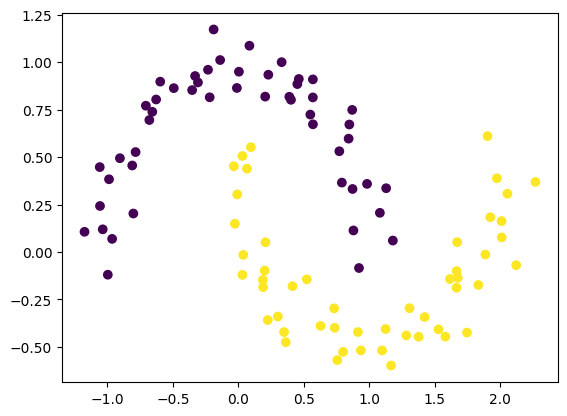

In [39]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

data = make_moons(n_samples=100, noise=0.1, random_state=42)

X = data[0]
y = data[1]

plt.scatter(X[:,0], X[:,1], c=y)

Далее вы попробуете разные кластеризации для поиска кластеров. Также замеряйте время работы каждого метода.

Попробуйте найти кластеры при помощи KMeans

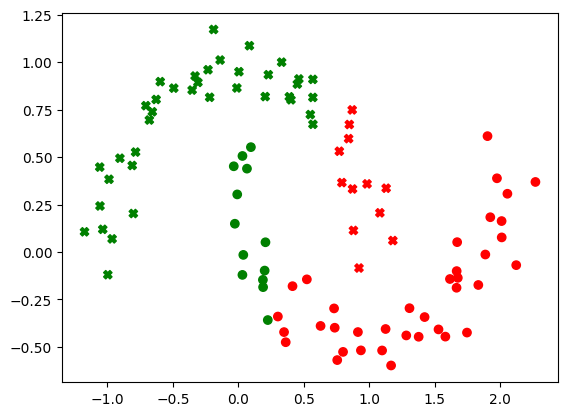

In [41]:
# ваш код здесь
import numpy as np

clustering = KMeans(n_clusters = 2).fit(X)

colors = ['r','g']
colors = np.array([colors[label] for label in clustering.labels_])
plt.scatter(X[y==0, 0], X[y==0, 1], c=colors[y==0], marker='X')
plt.scatter(X[y==1, 0], X[y==1, 1], c=colors[y==1], marker='o')

plt.show()

## Quiz

Подберите $\varepsilon$ и min_samples в DBSCAN, чтобы наилучшим образом найти кластеры.
Ищите гиперпараметры из диапазонов:
* eps in [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]
* min_samples in [4, 5, 6, 7]

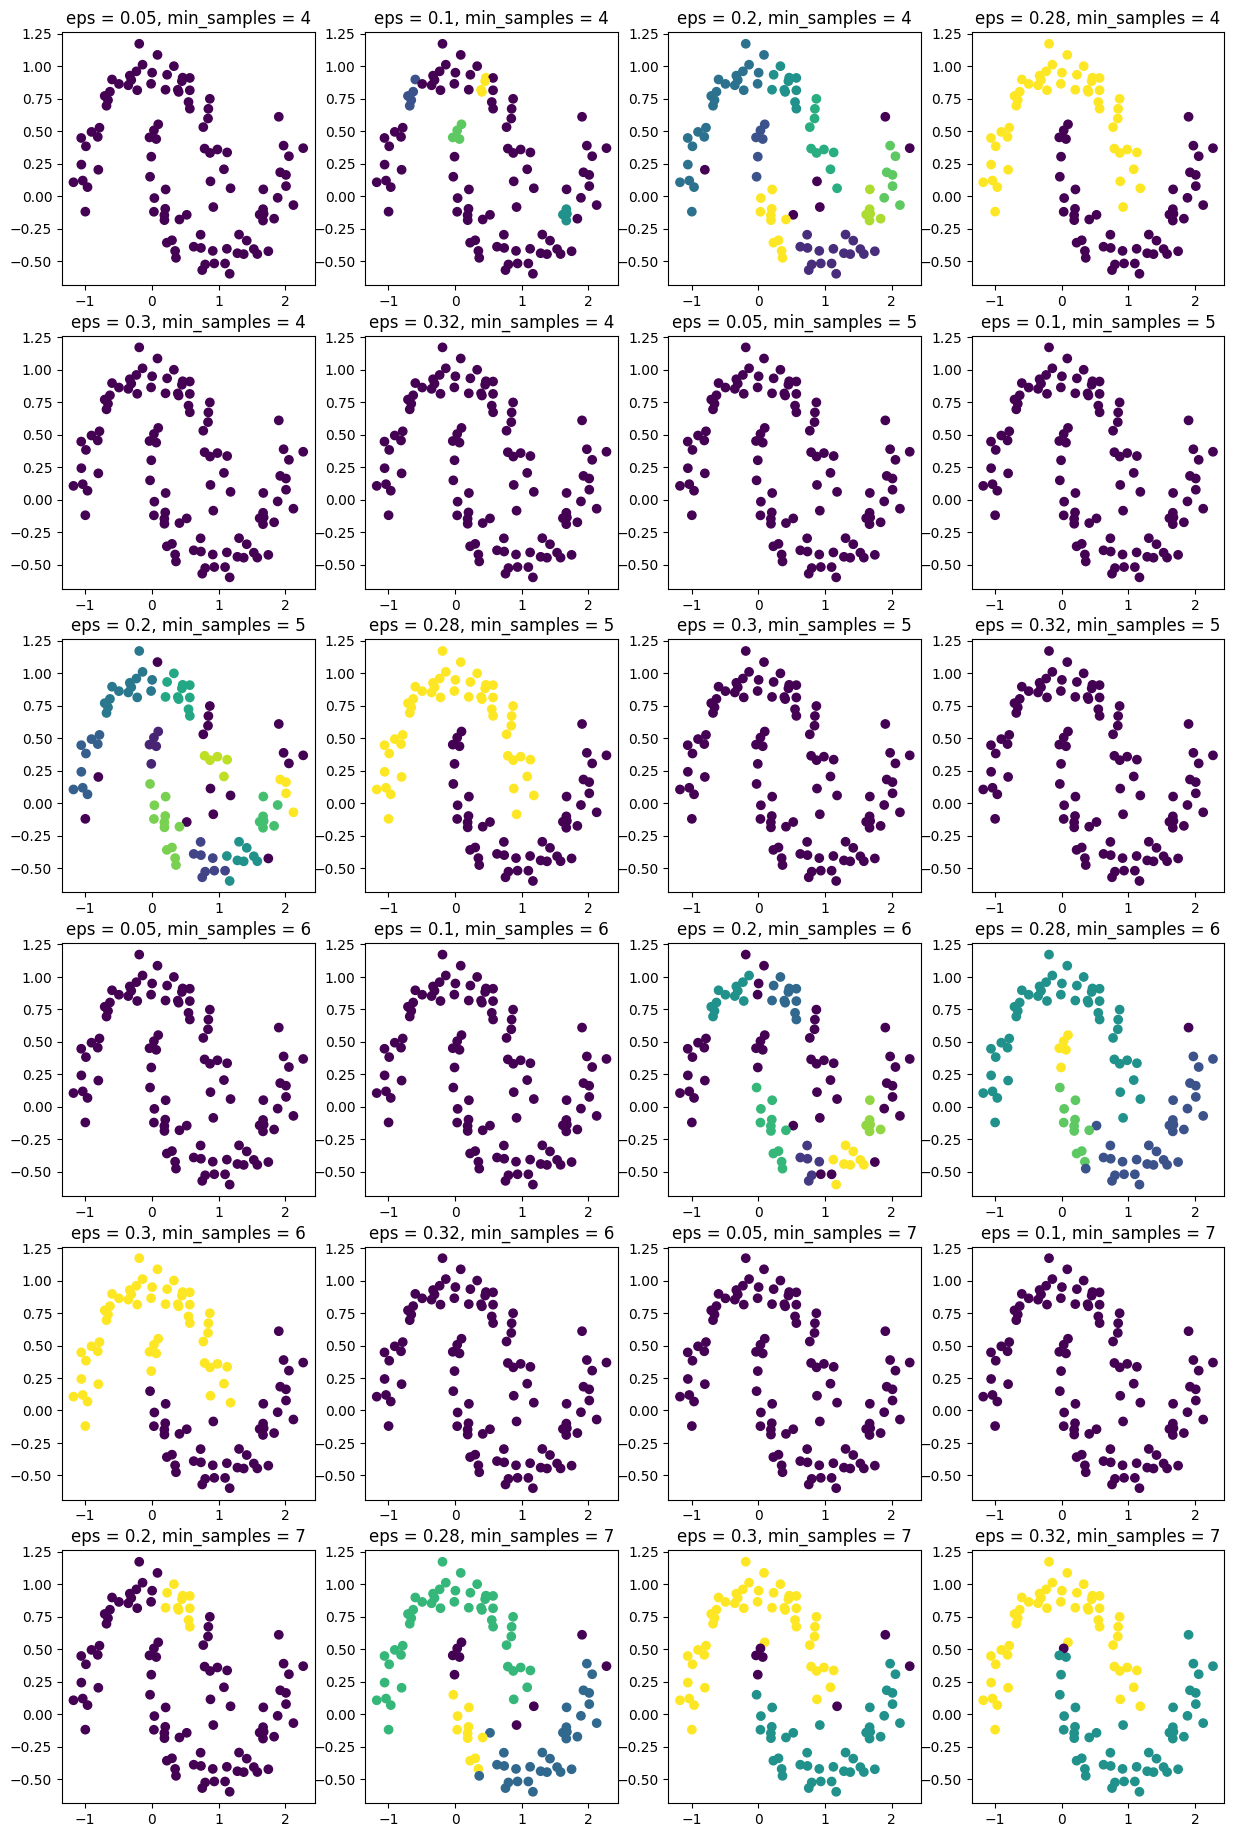

In [45]:
# ваш код здесь

from sklearn.cluster import DBSCAN

plt.figure(figsize= (15,23))
i = 1
for samples in [4, 5, 6, 7]:
    for e in [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X)
        plt.subplot(6, 4, i)
        plt.scatter(X[:,0], X[:,1], c = clusters)
        plt.title('eps = {}, min_samples = {}'.format(e, samples))
        i += 1
    

plt.show()

## Quiz

Используйте иерархическую кластеризацию для поиска кластеров.
Задайте в методе 2 кластера. Подберите гиперпараметр linkage из списка ['ward', 'complete', 'average', 'single'], дающий наилучший результат.

In [51]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Инициализируем лучшую оценку силуэта
best_silhouette = -1
best_linkage = ''

for linkage in ['ward', 'complete', 'average', 'single']:
    # Создаем экземпляр кластеризатора с текущим методом связывания
    agglomerative = AgglomerativeClustering(n_clusters=2, linkage=linkage)
    
    # Прогнозируем кластеры
    preds = agglomerative.fit_predict(X)  # Предполагается, что данные хранятся в переменной 'ratings'
    
    # Вычисляем силуэтный коэффициент
    silhouette = silhouette_score(X, preds)
    
    # Если текущий силуэтный коэффициент лучше предыдущего, обновляем лучший силуэт и лучший метод связывания
    if silhouette > best_silhouette:
        best_silhouette = silhouette
        best_linkage = linkage

print(f'Best linkage method: {best_linkage} with silhouette score: {best_silhouette}')


Best linkage method: ward with silhouette score: 0.4411761039820894


## Quiz

Попробуйте найти кластеры при помощи спектральной кластеризации.
Задайте 2 кластера, affinity='nearest_neighbors', random_state=42. Подберите гиперпараметр n_neighbors из диапазона [1,2,...,19], чтобы добиться наилучшего результата.

/home/nikita/.local/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


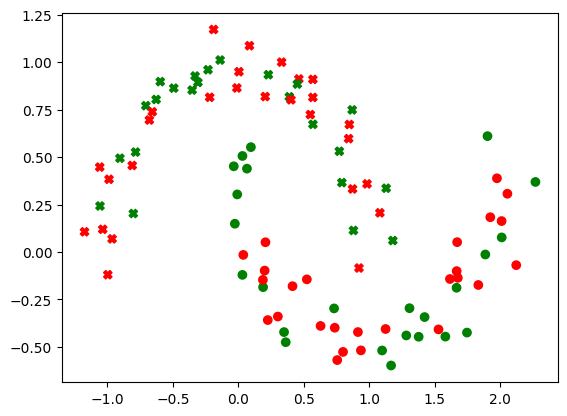

/home/nikita/.local/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


1 -0.007129159069023751
1 -0.007129159069023751


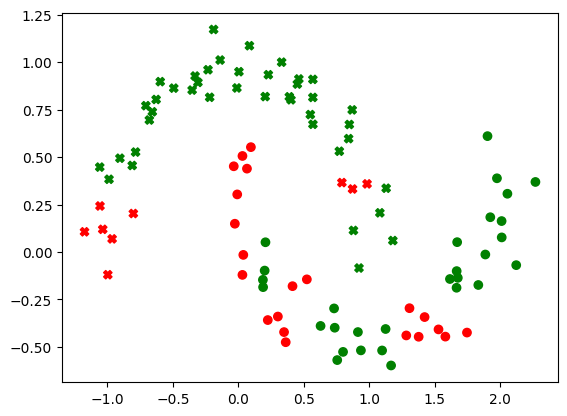

2 0.04335095519112449
2 0.04335095519112449


/home/nikita/.local/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


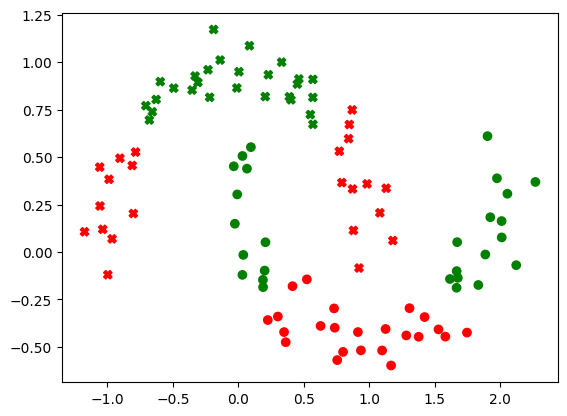

3 0.1302840831264983
3 0.1302840831264983


/home/nikita/.local/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


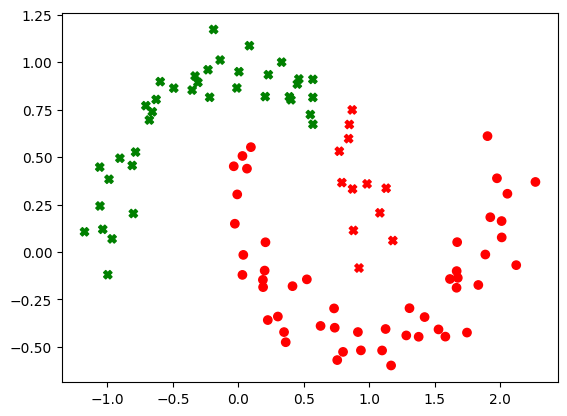

4 0.4117099420115076
4 0.4117099420115076


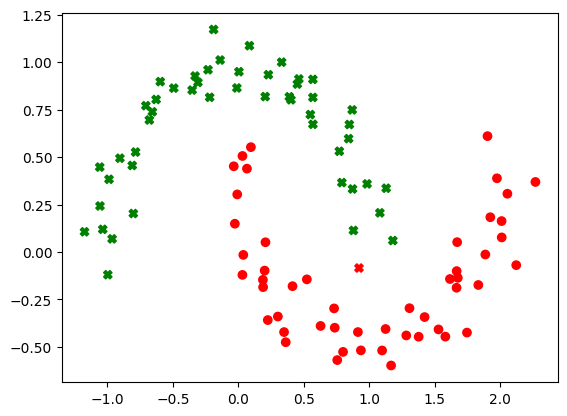

5 0.3203030209302953
4 0.4117099420115076


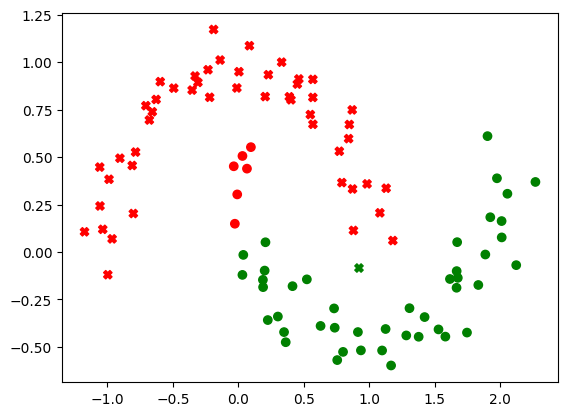

6 0.3936662830887382
4 0.4117099420115076


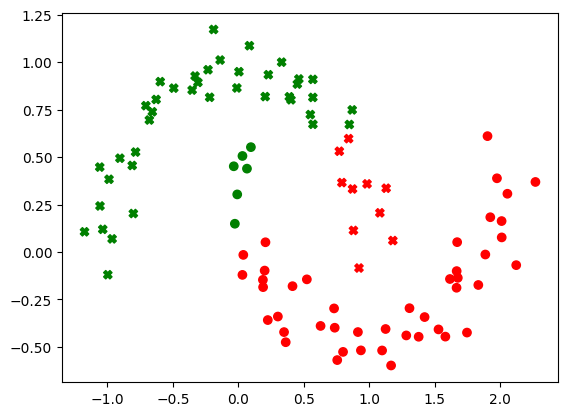

7 0.46110261742859426
7 0.46110261742859426


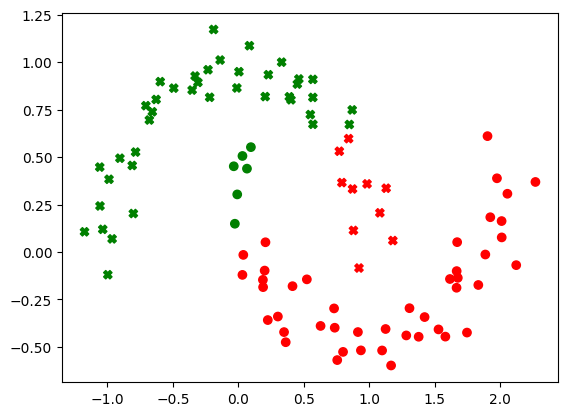

8 0.46110261742859426
7 0.46110261742859426


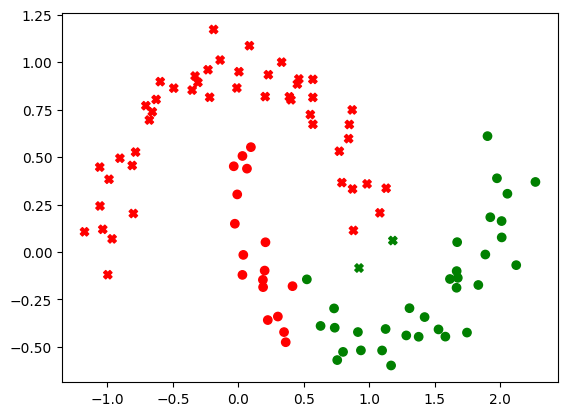

9 0.44689070892683475
7 0.46110261742859426


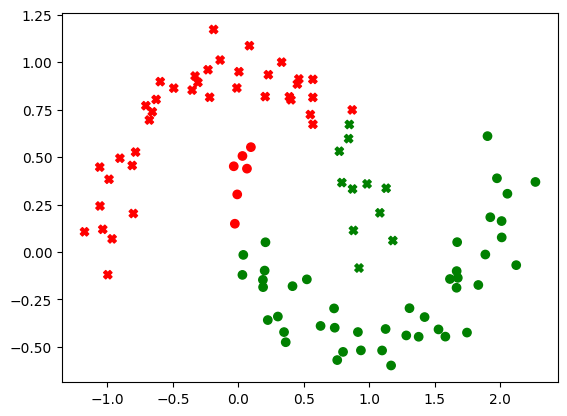

10 0.46420674939073797
10 0.46420674939073797


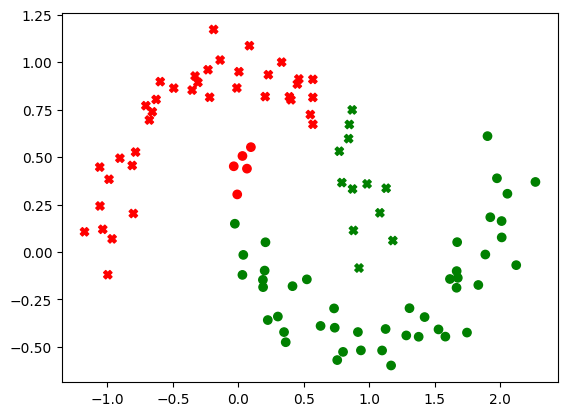

11 0.46062492283083584
10 0.46420674939073797


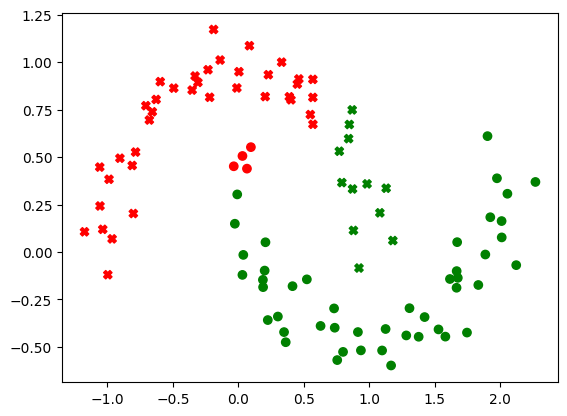

12 0.45142013948958193
10 0.46420674939073797


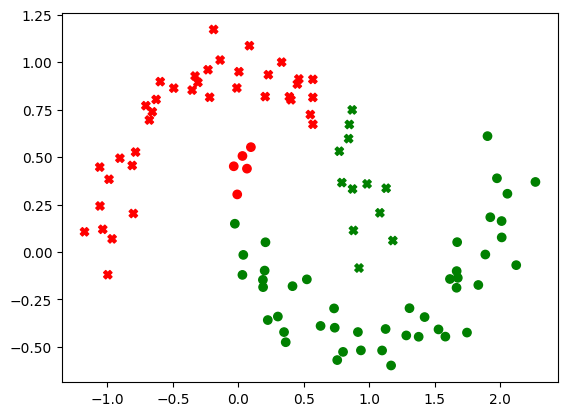

13 0.46062492283083584
10 0.46420674939073797


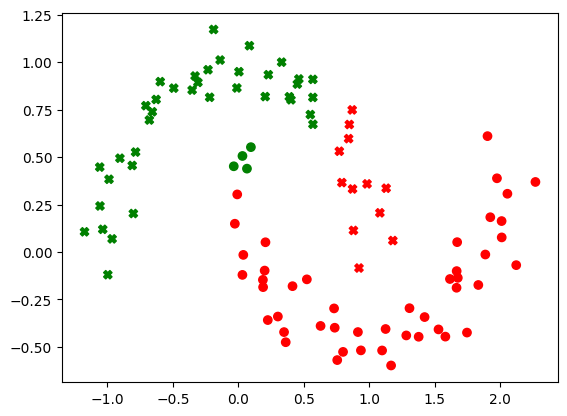

14 0.45142013948958193
10 0.46420674939073797


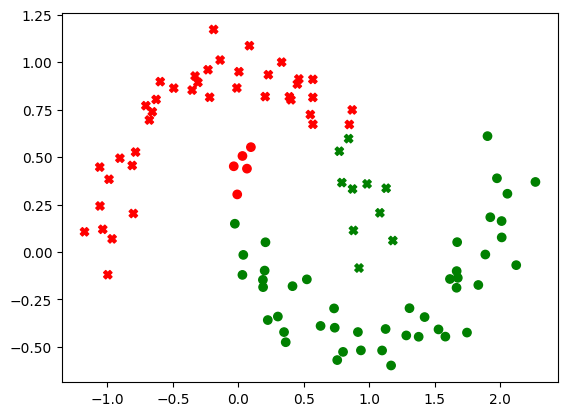

15 0.4536113047006344
10 0.46420674939073797


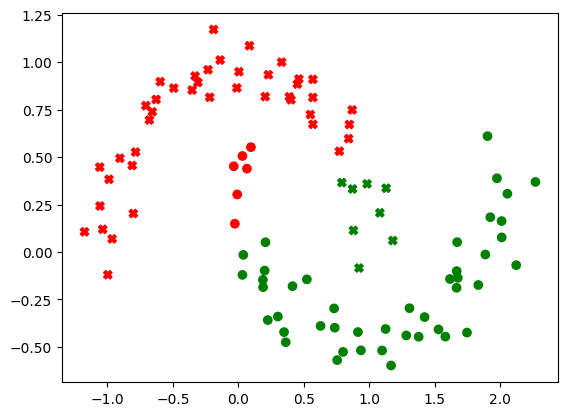

16 0.45615453312923937
10 0.46420674939073797


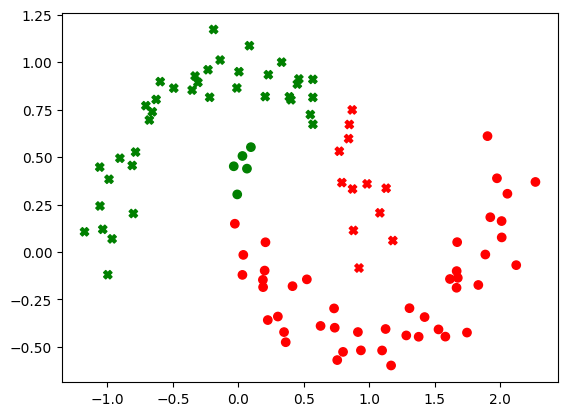

17 0.46062492283083584
10 0.46420674939073797


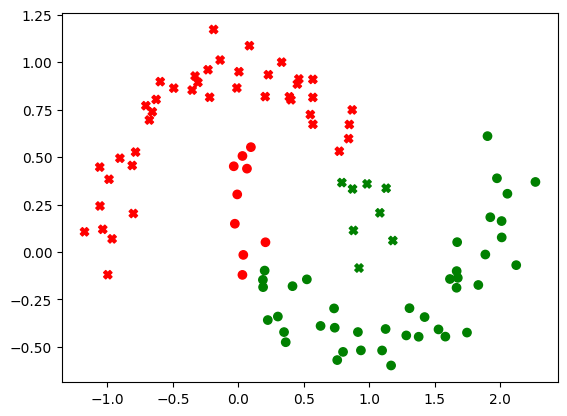

18 0.46673560492130245
18 0.46673560492130245


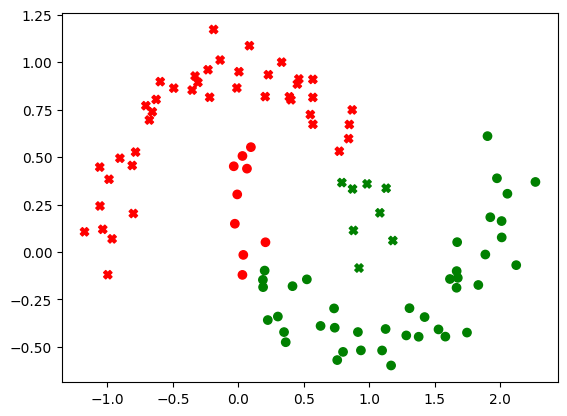

19 0.46673560492130245
18 0.46673560492130245


In [62]:
# ваш код здесь

from sklearn.cluster import SpectralClustering

best_silhouette=-1
best_n_neighbors=0

for n_neighbors in range(1,20):
    
    clustering = SpectralClustering(n_clusters=2, affinity = 'nearest_neighbors',random_state=42,n_neighbors=n_neighbors).fit(X)

    preds = clustering.labels_
    silhouette = silhouette_score(X, preds)
    colors = ['r','g']
    colors = np.array([colors[label] for label in clustering.labels_])
    plt.scatter(X[y==0, 0], X[y==0, 1], c=colors[y==0], marker='X')
    plt.scatter(X[y==1, 0], X[y==1, 1], c=colors[y==1], marker='o')
    plt.show()
    print(n_neighbors,silhouette)
    
    if silhouette>best_silhouette:
        best_silhouette=silhouette
        best_n_neighbors=n_neighbors
        
    print(best_n_neighbors,best_silhouette)




## Quiz

Сделайте выводы: какой метод сработал лучше других? какой метод сработал быстрее? есть ли метод, наилучший и по качеству, и по времени одновременно?